In [ ]:
# PROJETO SOBRE A QUEIMA DE FLORESTA NO TERRITÓRIO BRASILEIRO

In [6]:
## importando as libs 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#lendo o arquivo do banco de dados e convertendo a coluna date para datetime64
data = pd.read_csv('/kaggle/input/forest-fires-in-brazil/amazon.csv', encoding="iso-8859-1", parse_dates=['date'])

# 1ª parte: Dados técnicos do Dataset

In [17]:
# visualizando os tipos de dados do banco
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## Top 5 linhas do Banco de Dados

In [21]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## Últimas 5 linhas do banco de dados

In [22]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## Formato do Banco de Dados (número de linhas e colunas)

In [23]:
data.shape

# shape não é um método, e sim um atriputo da lib pandas que retorna o número de linhas e colunas

(6454, 5)

In [24]:
print("Número de linhas: ", data.shape[0])
print("Número de colunas: ", data.shape[1])

Número de linhas:  6454
Número de colunas:  5


## Informações gerais sobre o Dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## Verificar se há linhas duplicadas e excluí-las

In [26]:
data_duplicada = data.duplicated().any()
print("Existe linhas duplicadas? ", data_duplicada)

Existe linhas duplicadas?  True


In [27]:
data = data.drop_duplicates()

In [28]:
data.shape

(6422, 5)

In [31]:
print("Número de linhas excluídas: ", 6454-6422)

Número de linhas excluídas:  32


## Checando valores Null no Dataset

In [32]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## Estatísticas Gerais sobre o DataFrame

In [38]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## Mudando o nome das colunas para português

In [41]:
data.columns = ['ano', 'estado', 'mês', 'número', 'data']

In [43]:
display(data)

,ano,estado,mês,número,data
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


# 2ª parte: Análise dos dados

## Total de queimadas registradas:

In [45]:
data.shape

(6422, 5)

In [46]:
print("Total de queimadas registradas: ", data.shape[0])

Total de queimadas registradas:  6422


## Mês com maior número de queimadas

In [47]:
data.columns

Index(['ano', 'estado', 'mês', 'número', 'data'], dtype='object')

In [56]:
data1 = data.groupby('mês')['número'].sum().reset_index()
data1.sort_values("número")

,mês,número
0,Abril,28184.770
8,Março,30709.405
3,Fevereiro,30839.050
7,Maio,34725.363
4,Janeiro,47681.844
6,Junho,55997.675
2,Dezembro,57535.480
11,Setembro,58578.305
9,Novembro,85508.054
1,Agosto,88050.435


<Axes: xlabel='mês', ylabel='número'>

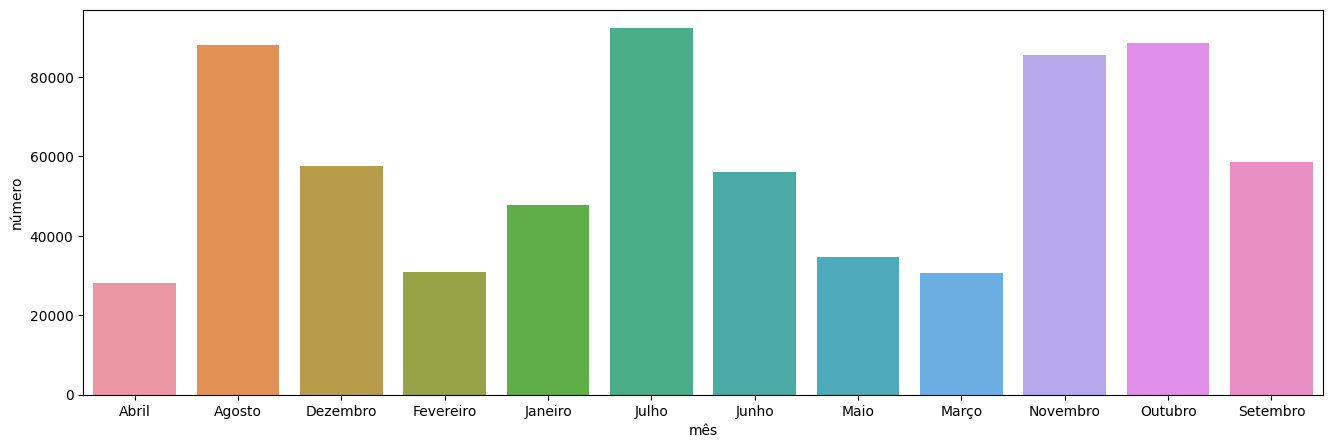

In [55]:
plt.figure(figsize=(16,5))
sns.barplot(x="mês", y="número", data = data1)

## Ano com maior número de queimadas registradas

In [57]:
data2 = data.groupby('ano')['número'].sum().reset_index()
data2.sort_values("número")

,ano,número
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
10,2008,29378.964
9,2007,33028.413
8,2006,33824.161
13,2011,34633.545
7,2005,35004.965
15,2013,35137.118


<Axes: xlabel='ano', ylabel='número'>

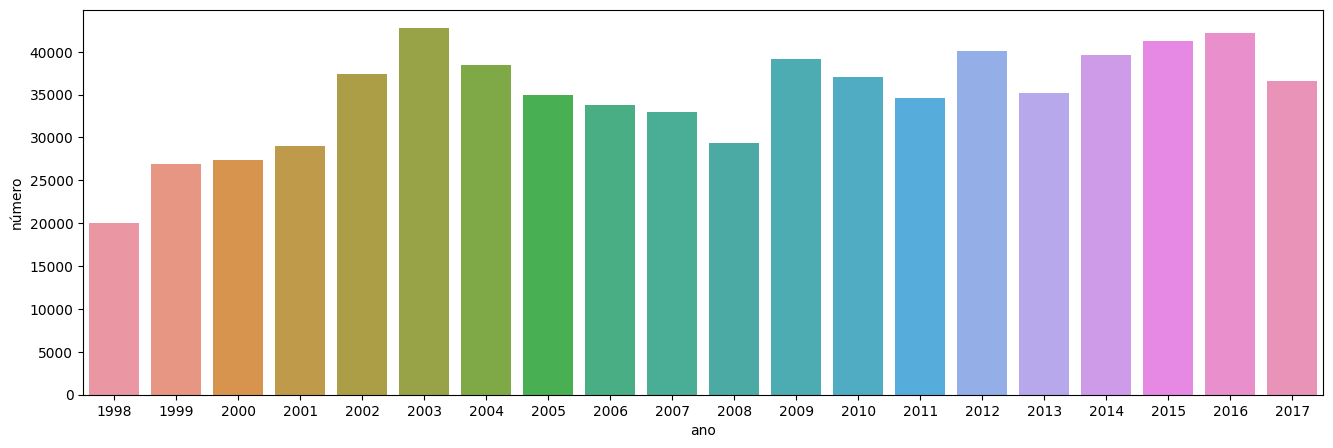

In [58]:
plt.figure(figsize=(16,5))
sns.barplot(x="ano", y="número", data = data2)

## Estado com maior número de queimadas registradas

In [60]:
data3 = data.groupby('estado')['número'].sum().reset_index()
data3.sort_values("número")

,estado,número
21,Sergipe,3237.000
6,Distrito Federal,3561.000
1,Alagoas,4606.000
7,Espirito Santo,6546.000
0,Acre,18464.030
17,Rondonia,20285.429
2,Amapa,21831.576
19,Santa Catarina,24359.852
18,Roraima,24385.074
14,Pernambuco,24498.000


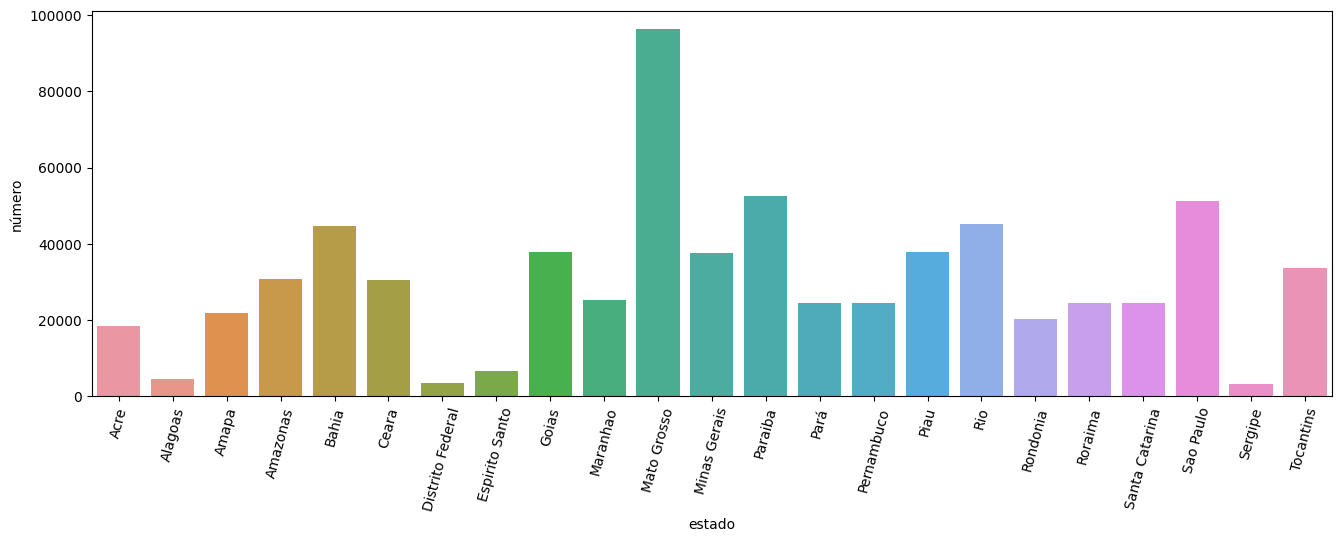

In [66]:
plt.figure(figsize=(16,5))
sns.barplot(x="estado", y="número", data = data3)
plt.xticks(rotation=75)
plt.show()

## Total de queimada do Amazonas

In [70]:
data[data['estado']=="Amazonas"]['número'].sum()

30650.129

## Total de queimadas no Amazonas por ano

In [74]:
data4 = data[data['estado']=="Amazonas"]
data5 = data4.groupby('ano')['número'].sum().reset_index()
data5

,ano,número
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


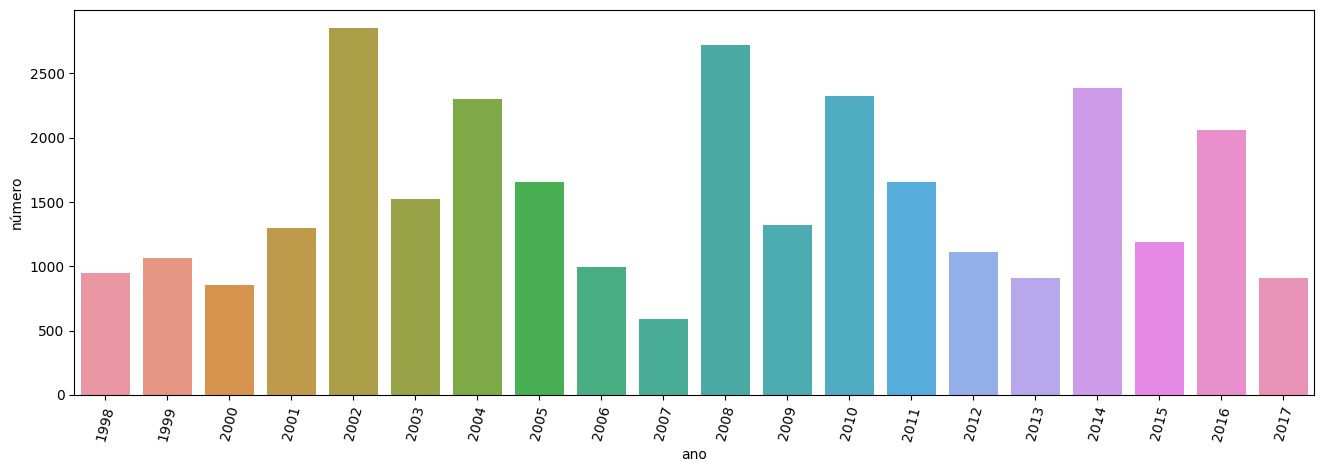

In [75]:
plt.figure(figsize=(16,5))
sns.barplot(x="ano", y="número", data = data5)
plt.xticks(rotation=75)
plt.show()

## Total de queimadas no Amazonas por dia

In [76]:
data6 = data[data['estado']=="Amazonas"]

In [78]:
data.columns

Index(['ano', 'estado', 'mês', 'número', 'data'], dtype='object')

In [89]:
day = data6.groupby(data6['data'].dt.dayofweek)['número'].sum()


In [90]:

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()
day

,index,número
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='número'>

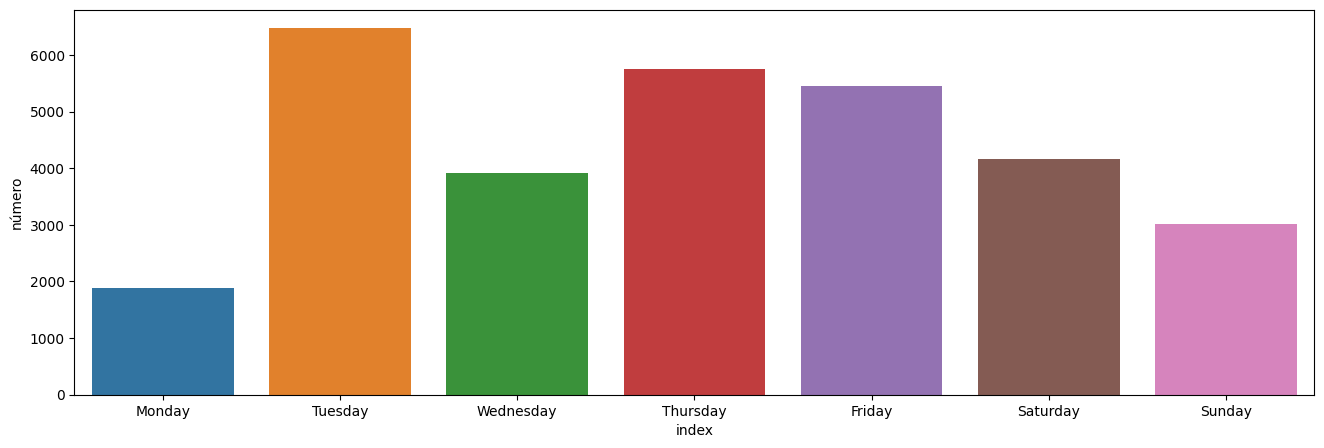

In [94]:
plt.figure(figsize=(16,5))
sns.barplot(x="index", y="número", data=day)